In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
sns.set() # Helps to set sytle in our viz

In [2]:
df = pd.read_csv('train_upvotes.csv')

In [3]:
df.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942,2,155623,7855,42
1,327662,a,26046,12,21781,55801,1175
2,468453,c,1358,4,56177,8067,60
3,96996,a,264,3,168793,27064,9
4,131465,c,4271,4,112223,13986,83


In [4]:
df.shape

(330045, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          330045 non-null  int64 
 1   Tag         330045 non-null  object
 2   Reputation  330045 non-null  int64 
 3   Answers     330045 non-null  int64 
 4   Username    330045 non-null  int64 
 5   Views       330045 non-null  int64 
 6   Upvotes     330045 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 17.6+ MB


### Relationship between feature

In [6]:
import warnings 
warnings.filterwarnings('ignore')

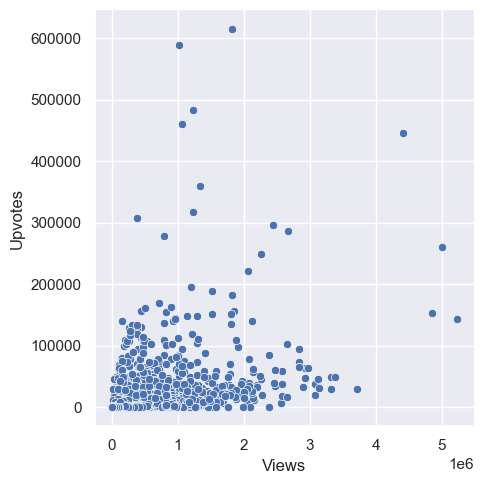

In [7]:
sns.relplot(data=df,x="Views", y="Upvotes");

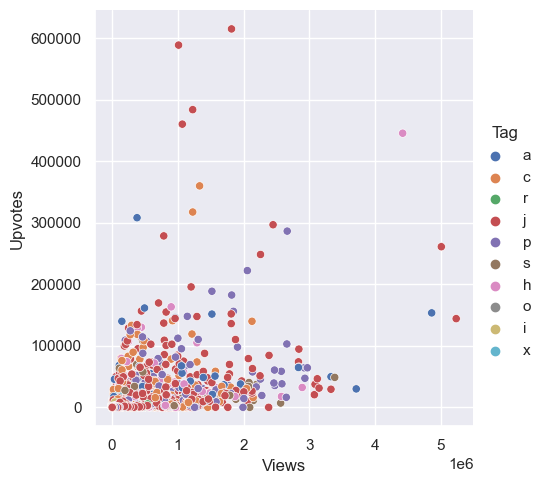

In [8]:
sns.relplot(data=df,x="Views", y="Upvotes", hue= "Tag");

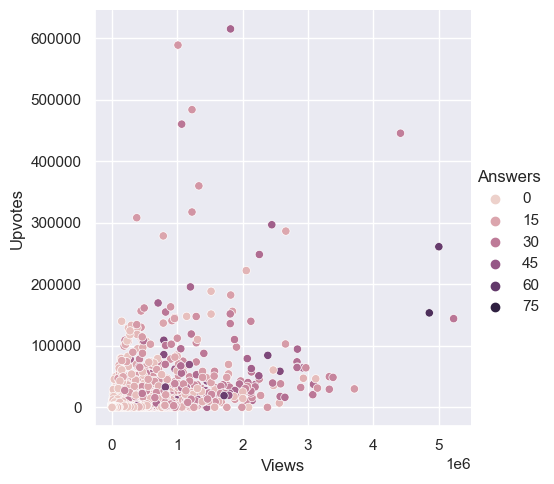

In [9]:
sns.relplot(data=df,x="Views", y="Upvotes", hue= "Answers");

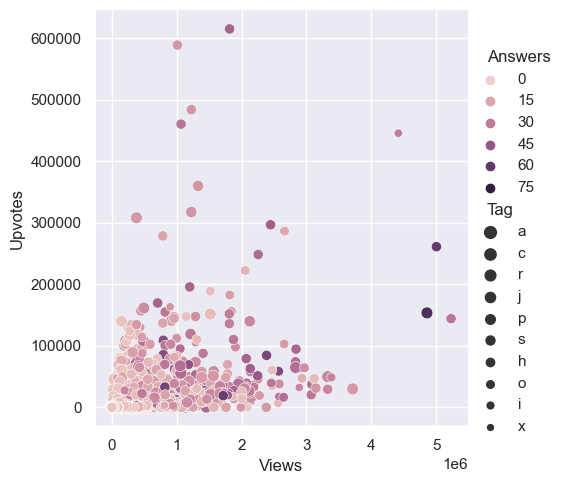

In [10]:
sns.relplot(data=df,x="Views", y="Upvotes", hue= "Answers", size='Tag');

In [11]:
#sns.relplot(data=df,x="Views", y="Upvotes", hue= "Answers", kind='line');

In [12]:
#sns.relplot(data=df,x="Views", y="Tag", hue= "Answers", kind='line');

In [13]:
df_2  = pd.read_csv("train_hr.csv")

In [14]:
df_2.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [16]:
df_2.shape

(54808, 14)

In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [19]:
df_2.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [20]:
df_2['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

#### method of handling the missing value
1. imputation method
2. drop
3. flog

Imputation would not be appropraite here because the feuture is categorical. ***Note: Mode should not be used for numerical data*** 

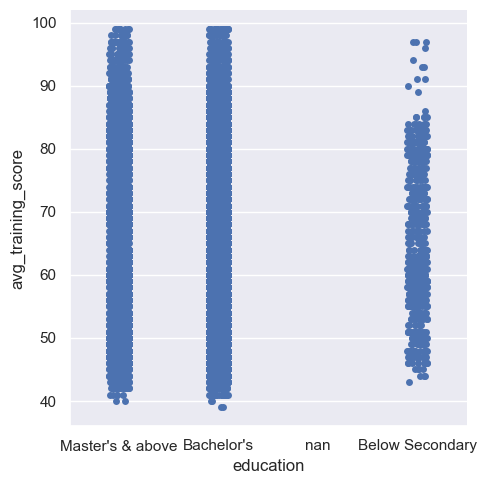

In [22]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score');

In [23]:
df_2= df_2.dropna(axis=0)

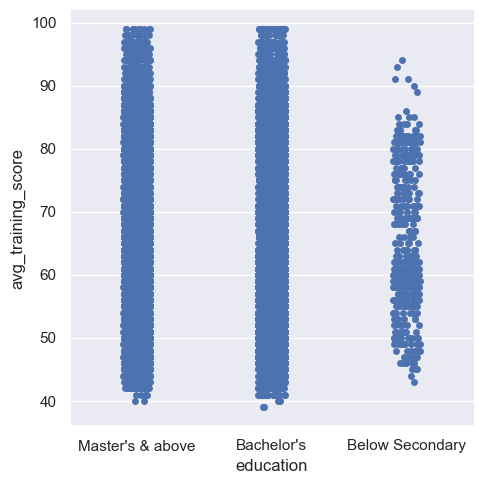

In [24]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score');

###### Strip plot
Strip plot creates a category, and plot the datapoint in the bar

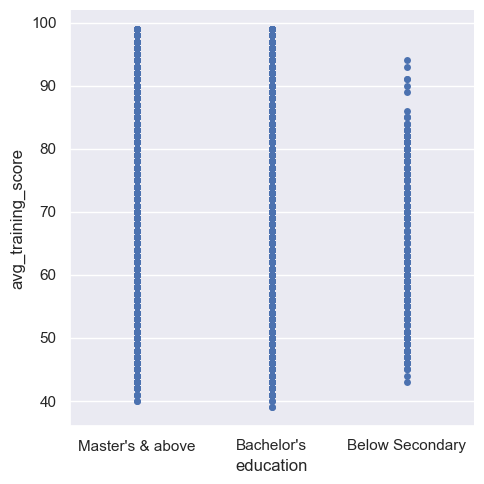

In [27]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score', jitter= False);

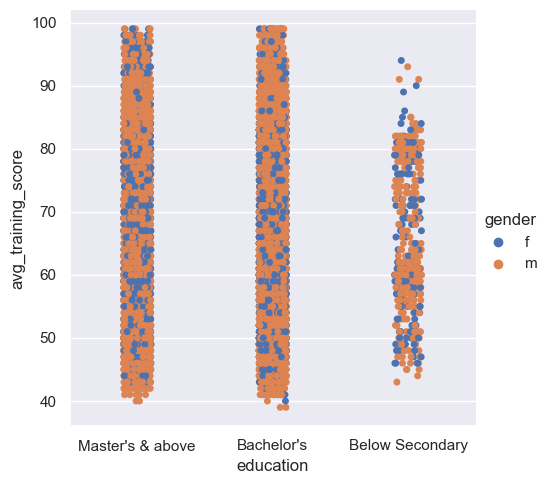

In [26]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score', hue= 'gender');

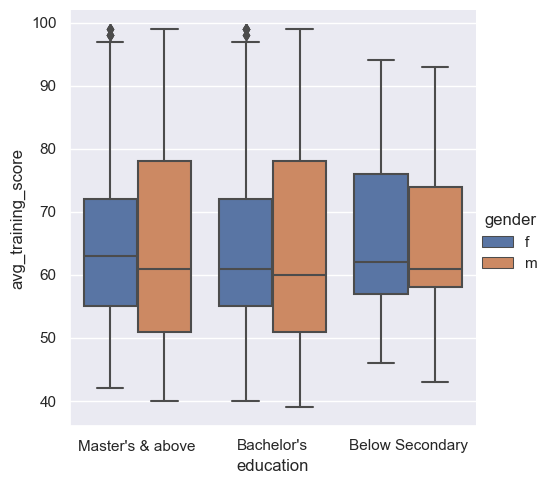

In [28]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score', hue= 'gender', kind='box');

Changing the kind of plot to box make the insight more clear

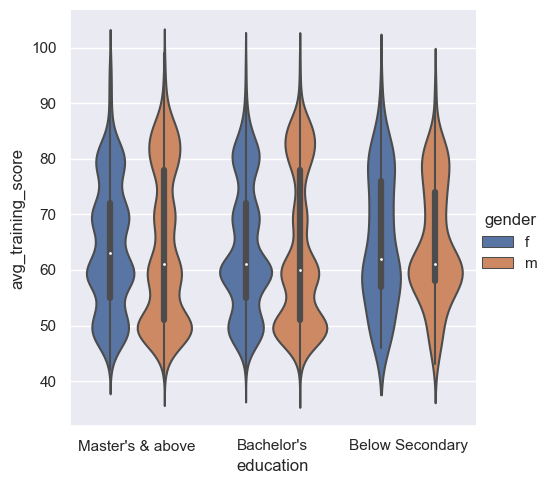

In [29]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score', hue= 'gender', kind='violin');

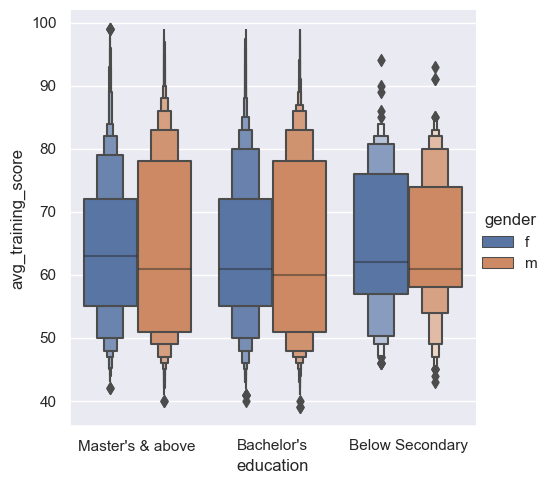

In [30]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score', hue= 'gender', kind='boxen');

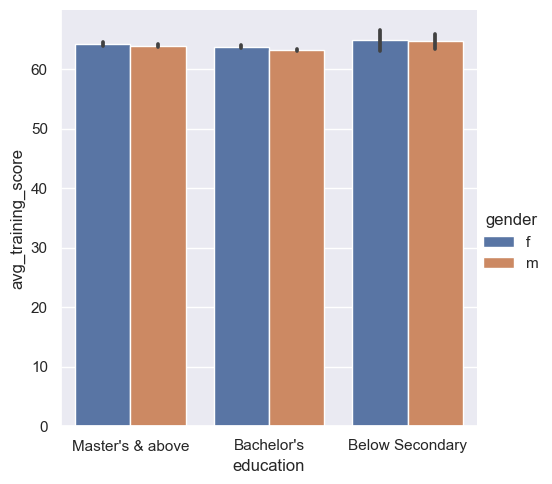

In [31]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score', hue= 'gender', kind='bar');

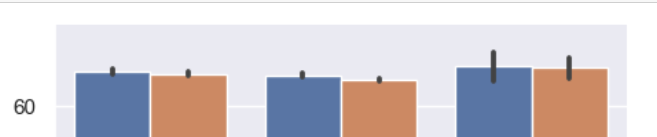
The black line on top are the mean average at the top of  black line and the range on the line in the error margin (confidence interval. 
For example average_training_score of the below secondary (f) is about 65 (the top of the bar) , while the CI is within (63-67)

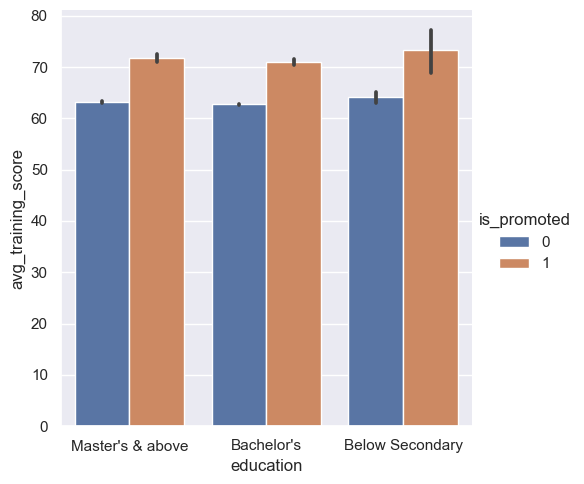

In [32]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score', hue= 'is_promoted', kind='bar');

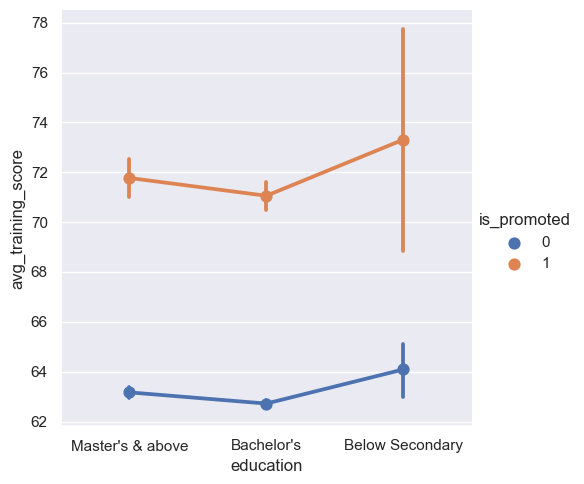

In [33]:
sns.catplot(data=df_2, x ='education', y = 'avg_training_score', hue= 'is_promoted', kind='point');

## Distribution plot

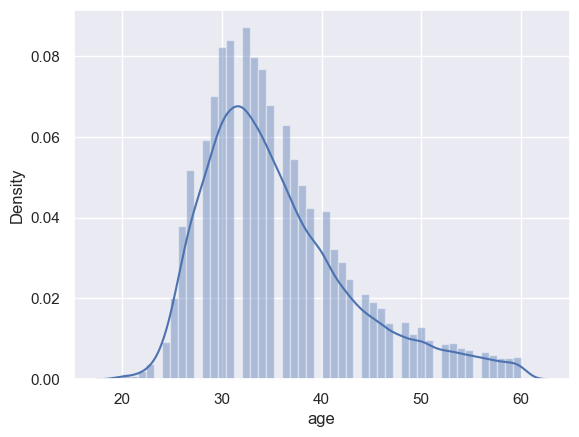

In [39]:
sns.distplot(df_2['age']);

### Removes the  density
Line on top

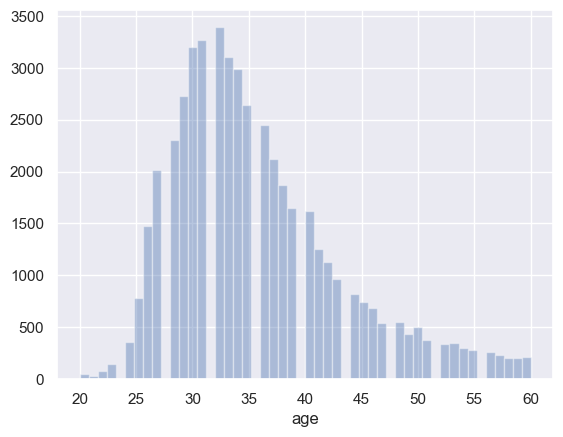

In [40]:
sns.distplot(df_2['age'], kde = False);

### Histplot

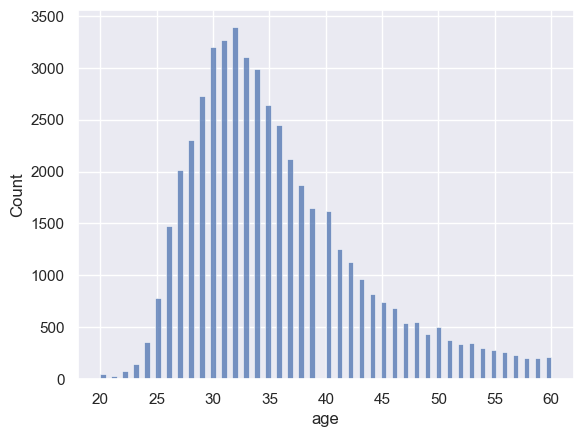

In [41]:
sns.histplot(df_2['age']);

In [42]:
## Displot

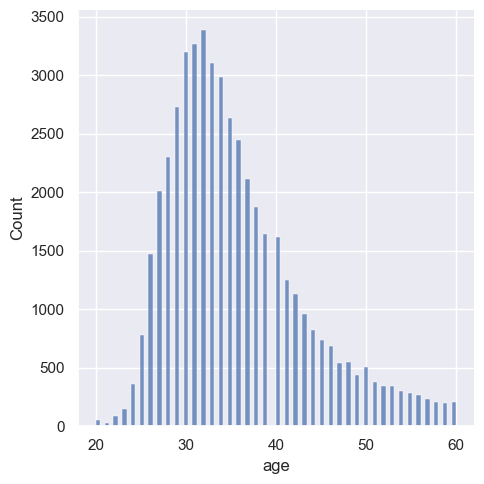

In [45]:
sns.displot(df_2['age']);

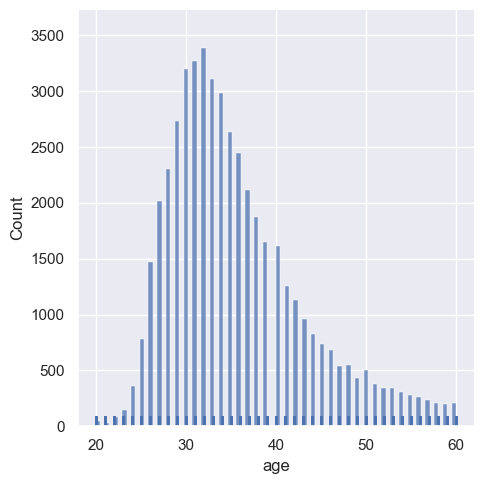

In [46]:
sns.displot(df_2['age'],rug=True);

#### Joint plot
##### How 2

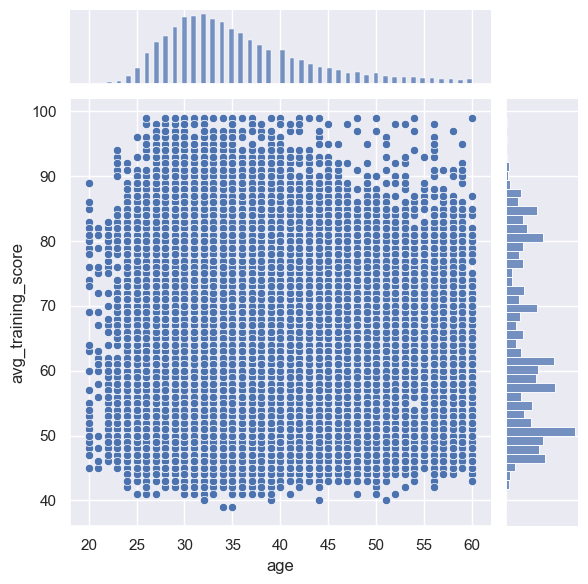

In [47]:
sns.jointplot(data=df_2, x= 'age', y="avg_training_score");

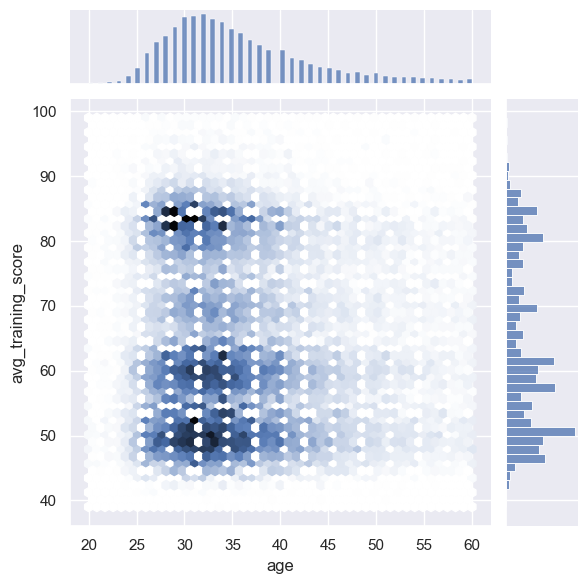

In [48]:
sns.jointplot(data=df_2, x= 'age', y="avg_training_score", kind='hex');

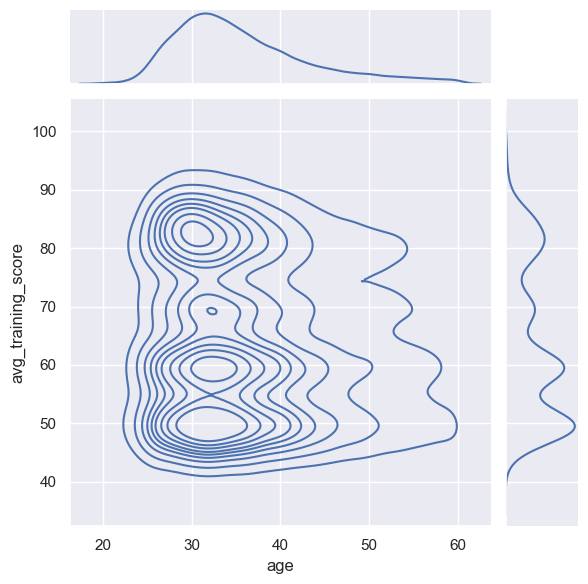

In [49]:
sns.jointplot(data=df_2, x= 'age', y="avg_training_score", kind='kde');

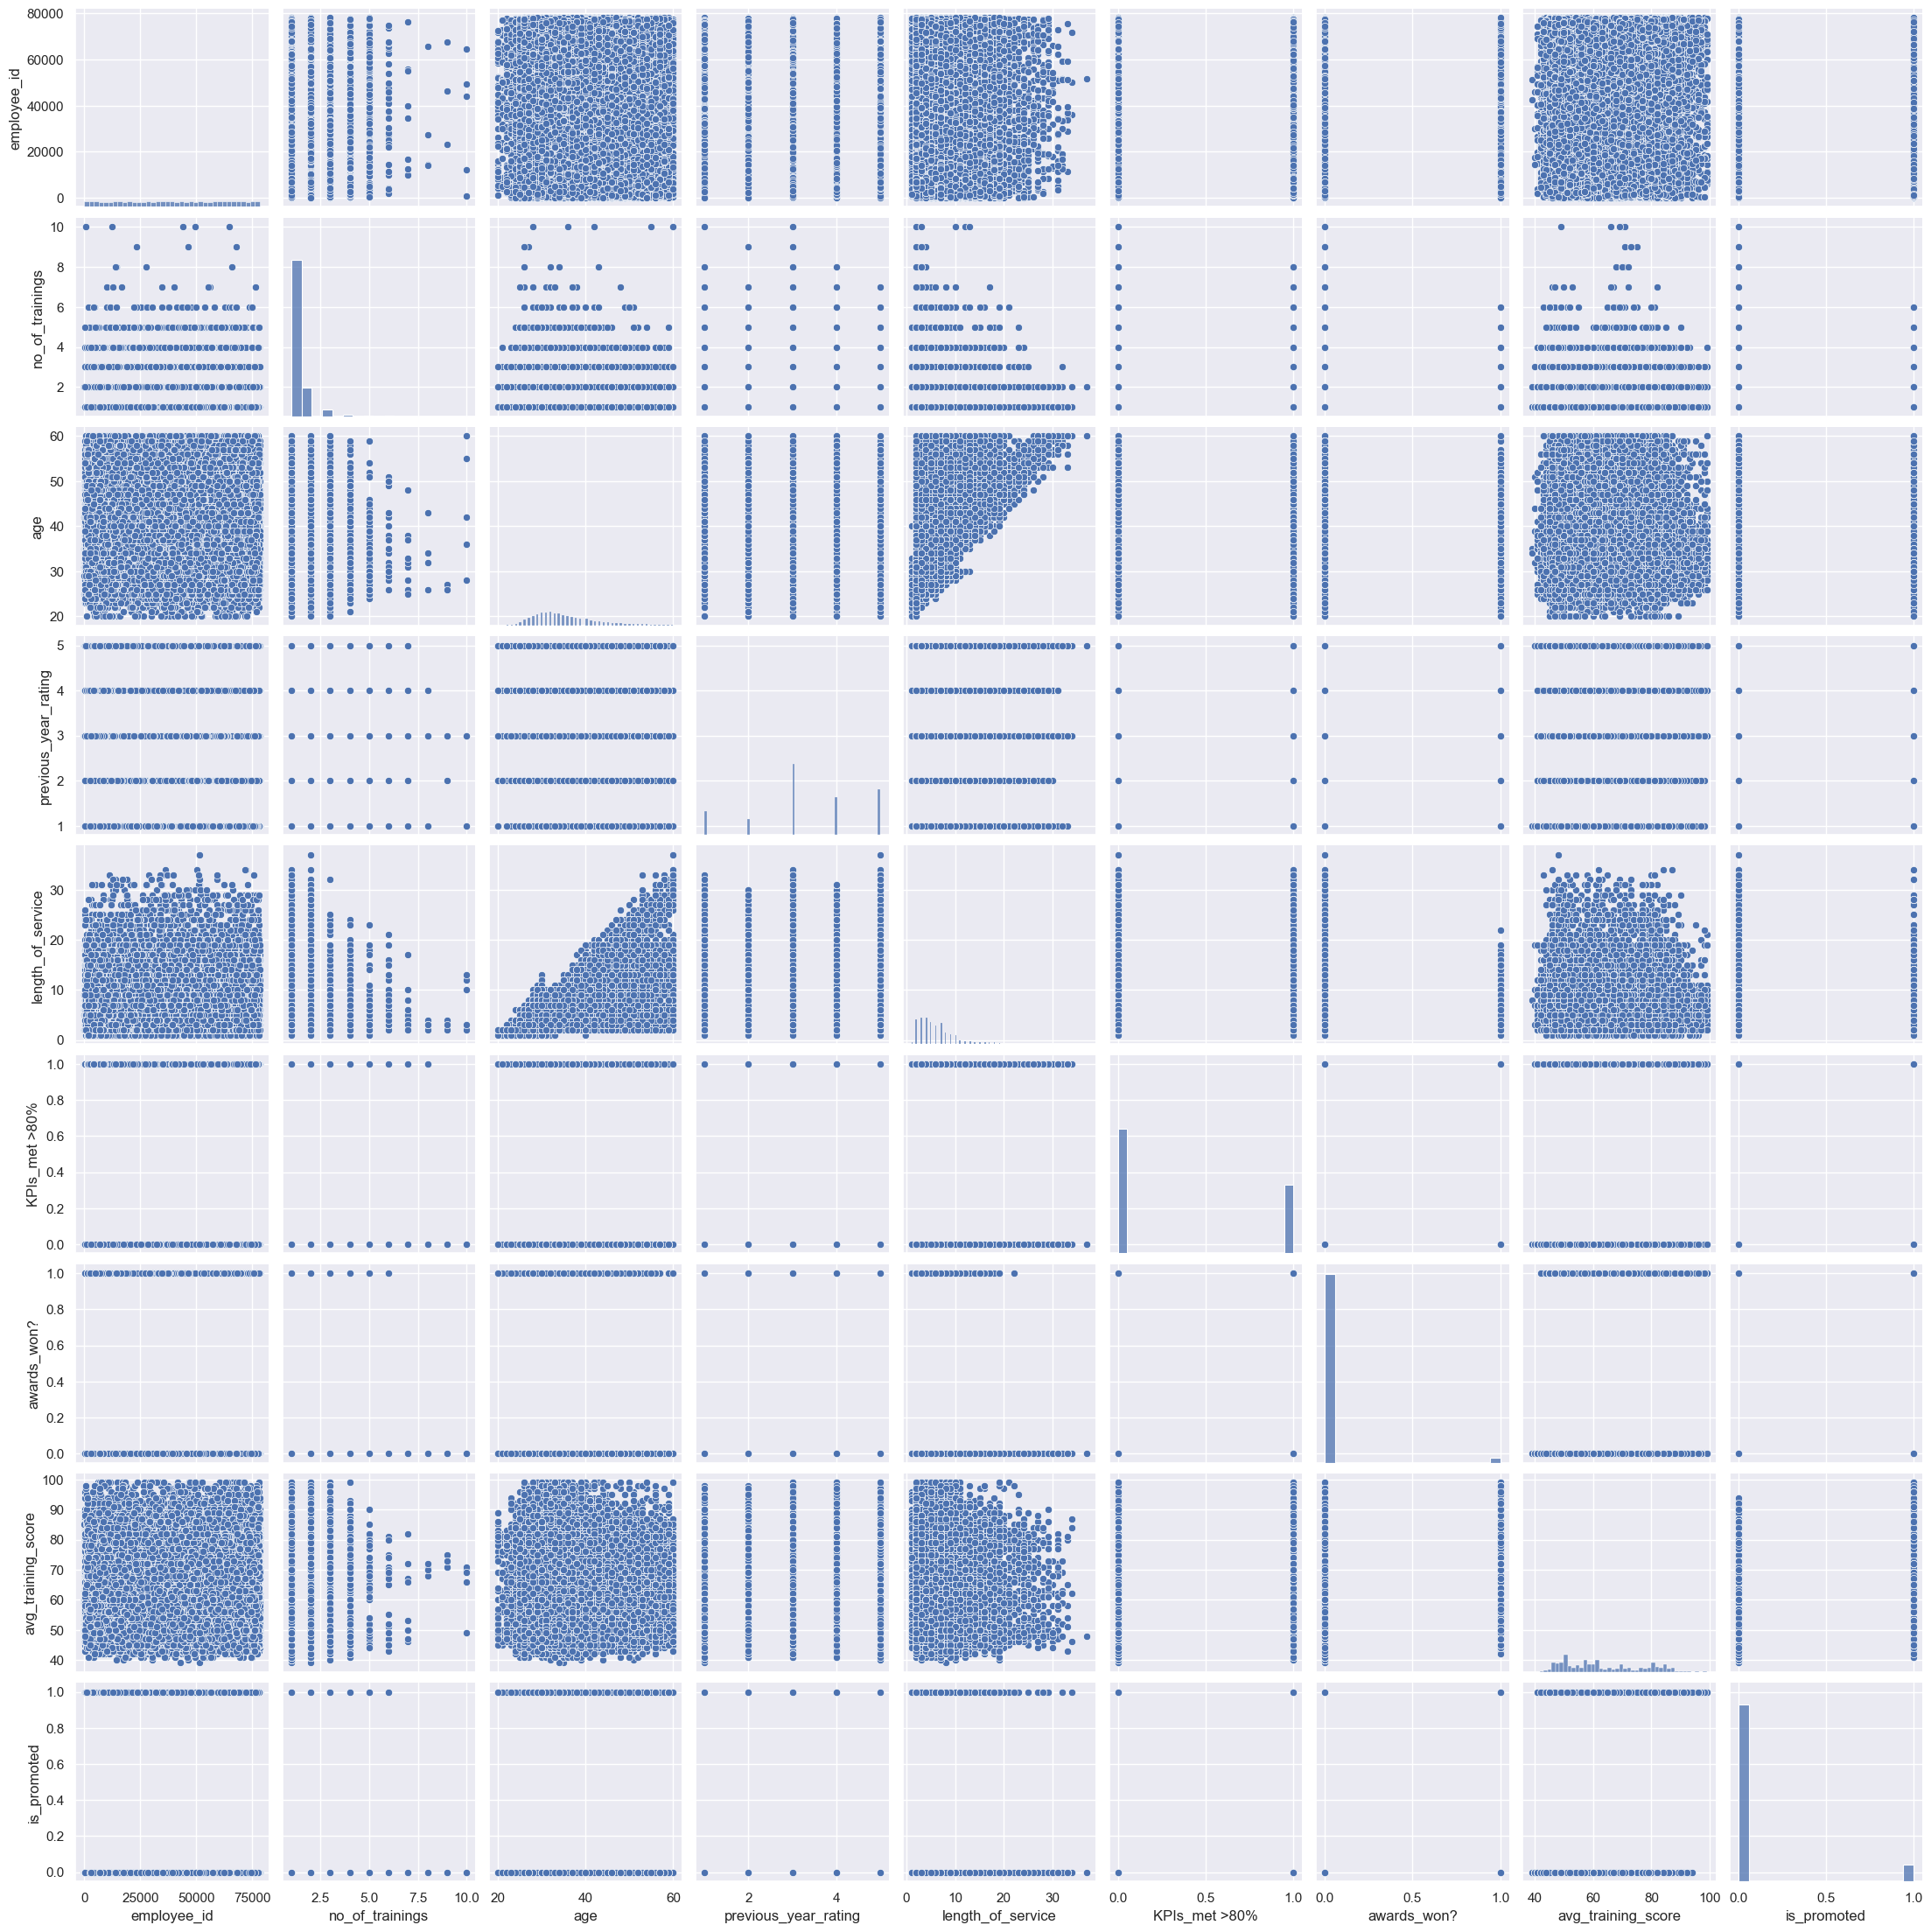

In [50]:
sns.pairplot(df_2)